Решение простой задачи бинарной классификации. Образ классифицируется неверно, если знак отступа (скалярное произведение вектора весов на вектор признаков, умноженное на целевое значение) принимает отрицательное значение.
$$ Вход: выборка X^l, шаг обучение \eta, максимальное число итераций N $$
$$Выход: вектор весов \omega = [\omega_1, \omega_2]^T$$
1) Инициализация $$ \omega = [0, -1]^T$$
2) Повторять N раз:
Если для отобранной пары x_i y_i произведена неверная классификация, то корректируем вес
$$M_i = sign(<\omega,x_i>)\bullet y_i < 0$$
$$\omega_1 = \omega_1 + \eta\bullet y_i$$
3) Показатель качества:
$$ Q(a, X^l) = [ \sum_{i=1}^{l} M_i <0] $$
4) Если показатель качества = 0, останавливаем цикл

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], \
    [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [10]:
# Размер обучающей выборки
n_train = len(x_train)

# Значение вектора w
w = [0, -1]

# Решающее правило
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])

N = 50 # максимальное число итераций
L = 0.1 # шаг изменения веса
e = 0.1 # добавка для w0, тобы был зазор между разделяющей линией и граничным образом

# Индекс последнего ошибочного наблюдения
last_error_index = -1 


In [13]:
for i in range(N):
    for i in range(n_train):
        if y_train[i] * a(x_train[i]) < 0:   # если ошибка классификации
            w[0] = w[0] + L * y_train[i]     # корректировка веса
            last_error_index = i
    # показатель качества
    Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
    if Q == 0:
        break  

In [14]:
if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]    

In [15]:
print(w)

[1.6000000000000003, -1]


In [16]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [w[0]*x for x in line_x]

In [17]:
x_0 = x_train[y_train == 1]       # формирование точек для 1-го класса
x_1 = x_train[y_train == -1]      # формирование точек для 2-го класса

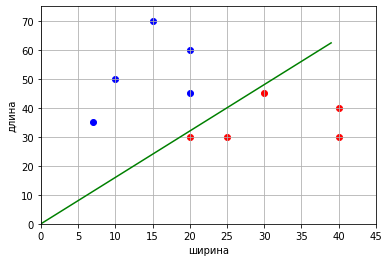

In [22]:
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')
plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()